# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/000000/external-image-analysis-big-data-flaticons-lineal-color-flat-icons-2.png" style="height:50px;display:inline"/> EE 046200 - Technion - Image Processing and Analysis
----

# Computer Homework 1
---
### <span style="color:red"> Due Date: 15.05.25 </span>

## <img src="https://img.icons8.com/clouds/100/000000/upload.png" style="height:50px;display:inline" /> Submission guidelines
---

### READ THIS CAREFULLY

*	**Please notice:** Some of the exercises contain questions on topics that are yet to be taught in the lecture or the frontal exercises. You may consider them as background or preparation questions to the topic before learning about it in class, or you may wait until the topic is taught, and solve only the questions on the topics you already learned.
*	**Avoid unethical behavior.** This includes plagiarism, not giving credit to source code you decide to use, and false reporting of results. Consulting with friends is allowed and even recommended, but you must write the code on your own, independently of others. The staff will treat unethical behavior with the utmost severity. **!אנא המנעו מהתנהגות שאינה אתית והעתקות**
*	Code submission in **Python only**.
    You can choose your working environment:
    * You can work in a Jupyter Notebook , locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> (the course's computer HW will not require a GPU).
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>. Both also allow opening/editing Jupyter Notebooks.
*	The exercise must be submitted **ALONE** (unless the computer homework grader approved differently) until **<span style="color:red"> Thursday 15.05.2025 at 23:55</span>**.
*	The exercise will be submitted via Moodle in the following form:
    You should submit two **separated** files:
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `hw1_id1.pdf` where `id1` is the ID number of the submitting student.
        * Be precise, we expect on point answers. But don't be afraid to explain you statements (actually, we expect you to).
        * Even if the instructions says "Show/Display...", you still need to explain what are you showing and what can be seen.
        * No other file-types ( `.docx` , `.html` , ...) will be accepted
    * A compressed `.zip` file, with the name: `hw1_id1.zip` which contains:
        * A folder named `code` with all the code files inside ( `.py` or `.ipynb` ONLY!)
            *	The code should be reasonably documented, especially in places where non-trivial actions are performed.
            *	Make sure to give a suitable title (informative and accurate) to each image or graph, and also to the axes. Ensure that graphs and images are displayed in a sufficient size to understand their content (and maintain the relationship between the axes - do not distort them).
        * A folder named `my_data`, with all the files required for the code to run (your own images/videos). make sure to refer to your input files in the code locally. i.e. (if the code is in 'code' directory, and the input file is in a parallel 'my_data' directory:
            `img = cv2.imread('../my_data/my_img.jpg')`
        * **DO NOT** include the given input data in the zip. The code should refer to the given input data as it is located in a folder named `given_data`. i.e.:
            `img = cv2.imread('../given_data/given_img.jpg')`
*	If you submit your solution after the deadline, 4 points will be reduced automatically for each of the days that have passed since the submission date (unless you have approved it with the course staff before the submission date). Late submission will be done directly to the computer homework grader via mail, and not via Moodle.
*	Several Python, numpy, openCV reference files are attached in the Moodle website, and you can of course also use the Internet's help.
*	Questions about the **computer** exercise can be directed to the computer homework grader through the relevant Moodle forum or by email **and not during the workshop hours**.


## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> General Notes:
---
### The ‘imshow’ function:
Full name: `matplotlib.axes.Axes.imshow`

The ‘imshow’ function is used to display images. The function expects to get a matrix whose members are in "discrete" `unit8` format (in the range [0,255]) or in "continuous" `float` format (in the range [0,1]). the dynamic range is determined by the format. These formats are acceptable for images. 

### Discrete Fourier Transform:
2-dimentional discrete Fourier transform (2D-DFT) in numpy is done using the function `np.fft.fft2`. After the transform, use `np.fft.fftshift` to bring the low frequencies to the center of the transform image.

**IMPORTANT NOTE:** When using `fftshift` after `fft2`, you must not forget to use `ifftshift` before performing the inverse transform `ifft2`. In addition, there is no need to convert the image to double before the transform.

**Convenient representation scale for transformation:** Note that displaying the amplitude of the transform on a log scale: `np.log(1 + np.abs(...))` allows large and small values to be seen in the same image. This overcomes the contrast problem created by the Fourier transform.


In [1]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2


## <img src="https://img.icons8.com/external-kosonicon-outline-kosonicon/64/000000/external-bar-graph-diagram-and-graph-kosonicon-outline-kosonicon.png" style="height:50px;display:inline"/> Part 1 - Histograms and Point Operations
---

During this part we will use the boat image in the `given_data` directory.

### 1.a - Histogram

In this section, you are rquired to load the image `given_data/boat.jpg` in grayscale and display the image and its histogram, using `fig.addsubplot` function. 

Explain in your report what do you observe in the histogram.

In [2]:
def show_gray_image_and_hist(image, title='Grayscale Image', bins=256):
    
    fig = plt.figure(figsize=(8, 4))

    #image plot
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(image, cmap='gray')
    ax1.set_title(title)
    ax1.axis('off')

    #histogram plot
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.hist(image.ravel(), bins=bins, range=[0, 256])
    ax2.set_title('Histogram')

    plt.tight_layout()
    plt.show()

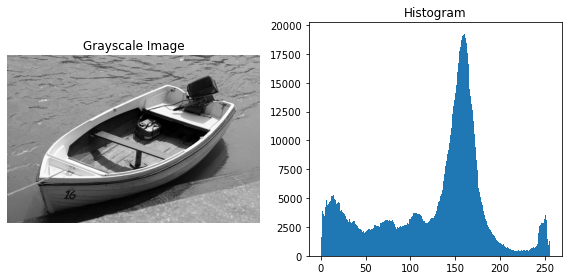

In [3]:
boat = cv2.imread('../given_data/boat.jpg', cv2.IMREAD_GRAYSCALE)
show_gray_image_and_hist(boat)

### 1.b - Negative 

Implement the function `negative_img` function.

In [4]:
def negative_img(img):
 
    # ====== YOUR CODE: ======
    neg_img = 255 - img #inverted pixel values
    # ========================
    return neg_img

Now, apply the function `negative_img` on the boat image, and display the negative image result and its histogram. 

What do we expect to observe in the new image? What do we expect to observe in the new image's histogram?

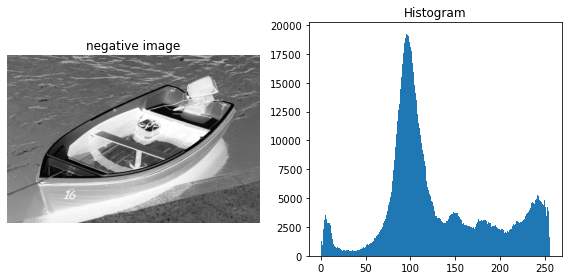

In [5]:
img = negative_img(cv2.imread('../given_data/boat.jpg', cv2.IMREAD_GRAYSCALE))
show_gray_image_and_hist(img, title='negative image')

### 1.c - Contrast Enhancement

Implement the `contrast_enhancement` function, using the formula:

$$f_{out} = \frac{f_{in} - a}{b - a} $$ 

Where:
* $f_{in}$ is the input image.
* $a$ is the minimum value of the grayscale input image.
* $b$ is the maximum value of the grayscale input image.

You can use `np.min(), np.max()` to find $a, \ b$.

In [6]:
def contrast_enhancement(img: np.ndarray):
    """
    Perform contrast enhancment on the given img.
    :param img: An input grayscale image - ndarray of uint8 type.
    :return:
        contrast_enhanced_img: An output grayscale image after applying contrast enhancment -
                      uint8 ndarray of size [H x W x 1]
    """
    # ====== YOUR CODE: ======
    a = np.min(img)
    b = np.max(img)
    
    #apply formula
    img_enhanced = (img - a)/(b - a)
    
    #return to grayscale uint8 ndarray
    contrast_enhanced_img = (img_enhanced * 255).astype(np.uint8)
    # ========================
    return contrast_enhanced_img

Now, apply the function `contrast_enhancement` on the boat image. Afterwards display the contrast enhanced image result and its histogram. 

Can you observe any difference in the image? Can you observe any difference in its histogram? Explain the results.

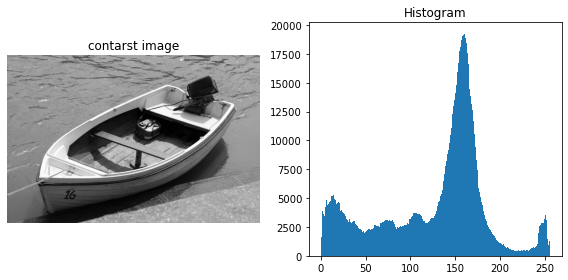

In [7]:
gray = cv2.imread('../given_data/boat.jpg', cv2.IMREAD_GRAYSCALE)
img = contrast_enhancement(gray)
show_gray_image_and_hist(img, title='contarst image')

Load the image `given_given_data/boat_brighetened.jpg` as a grayscale image, using `cv2.imread('./given_data/boat_brightened.jpg', cv2.IMREAD_GRAYSCALE)` (This is possible since the image itself is saved in grayscale). 

Now, apply the `contrast_enhancement` function on the `given_data/boat_brighetened.jpg`, and compare the results against applying contrast enhancement on the original boat image.

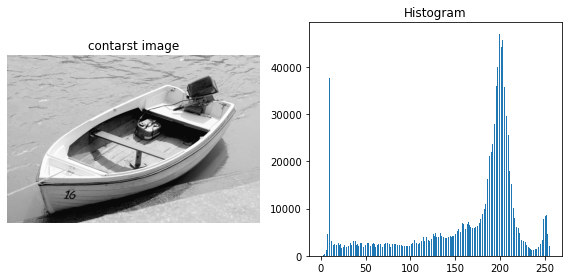

In [8]:
bright_gray = cv2.imread('../given_data/boat_brightened.jpg', cv2.IMREAD_GRAYSCALE)
img = contrast_enhancement(bright_gray)
show_gray_image_and_hist(img, title='contarst image')

### 1.d - Gamma Correction

Implement the `gamma_correction` function.

In [9]:
def gamma_correction(img, gamma): 
    """ 
    Perform gamma correction on a grayscale image. 
    :param img: An input grayscale image - ndarray of uint8 type. 
    :param gamma: the gamma parameter for the correction. 
    :return: 
        gamma_img: An output grayscale image after gamma correction -  
                   uint8 ndarray of size [H x W x 1]. 
    """ 
    # ====== YOUR CODE: ====== 
    # normalize to [0,1]
    img_norm = img / 255
    #apply gamma factor
    img_gamma_fac = np.power(img_norm, gamma)
    # scale back to [0, 255]
    gamma_img = (img_gamma_fac * 255).astype(np.uint8)
    # ======================== 
 
    return gamma_img 

Apply Gamma correction on the original boat image using the following possible operations:
1. Gamma correction with $\gamma=0.3$
1. Gamma correction with $\gamma=1.7$ 

Display the grayscale output image for each of the mappings. Furthermore, plot the corresponding histogram per output image.

Explain the results.

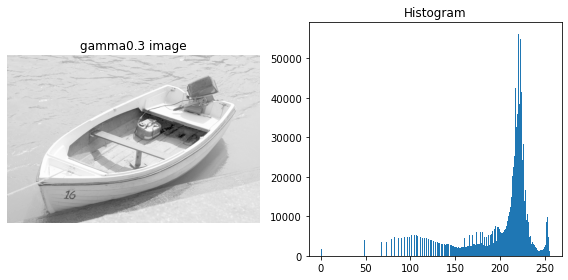

In [10]:
original_img = cv2.imread('../given_data/boat.jpg', cv2.IMREAD_GRAYSCALE)
gamma = 0.3
img = gamma_correction(original_img, gamma)
show_gray_image_and_hist(img, title='gamma0.3 image')

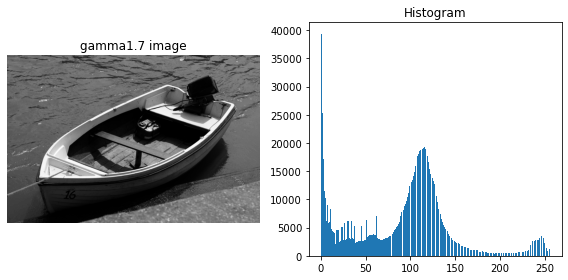

In [11]:
original_img = cv2.imread('../given_data/boat.jpg', cv2.IMREAD_GRAYSCALE)
gamma = 1.7
img = gamma_correction(original_img, gamma)
show_gray_image_and_hist(img, title='gamma1.7 image')

### 1.e - Average & Median Filters

In this section, you are going to apply average & median filters, and compare their visual results. 
Since the boat image is an authentic image, i.e. captured by a camera, there is noise in the image that can be modeled as additive noise. We'll apply average and median filters to see their effect on the image. 

First, let's apply an average filter on the boat image, by using kernel $K$ and the opencv function `cv2.filter2D` where:
$$K=\frac{1}{9}\cdot\begin{pmatrix}1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{pmatrix}$$

Display the resulting image after filtering, and its histogram. Explain the results.

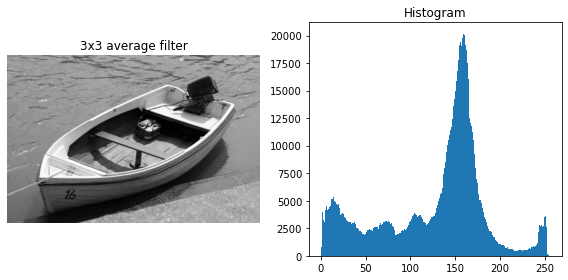

In [12]:
#kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

#apply filter
avg_3x3 = cv2.filter2D(gray, -1, kernel_3x3)

show_gray_image_and_hist(avg_3x3, title='3x3 average filter')

Repeat the process, but now use an averaging filter with `9x9` kernel. Pay attention to the normalization term.

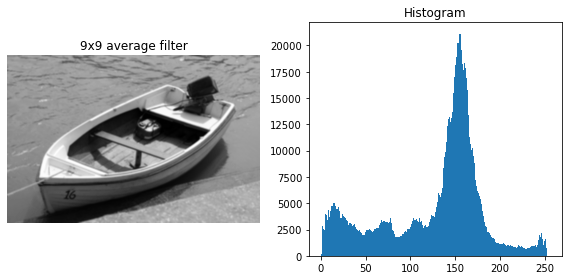

In [13]:
#kernel
kernel_9x9 = np.ones((9, 9), np.float32) / 81

#apply filter
avg_9x9 = cv2.filter2D(gray, -1, kernel_9x9)

show_gray_image_and_hist(avg_9x9, title='9x9 average filter')

Apply A median filter on the boat image using `cv2.medianBlur` function with `9x9` kernel.

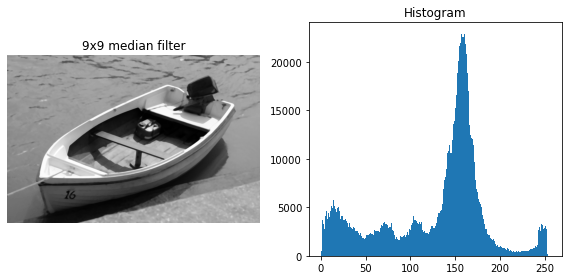

In [14]:
#apply filter
median_f = cv2.medianBlur(gray, 9)

show_gray_image_and_hist(median_f, title='9x9 median filter')

Compare the images resulted from both filters with the original image. 

Report the phenomena you observe. What will happen if you increase/decrease the kernel size? 

## Part 2 - Frequency and Symmetry in Images
### 🧠 Symmetry and Frequency-Domain Filtering

Let $ f(x, y) $ be a **spatially symmetric image**, meaning the image is invariant under any rotation around its center: \
Let $R_{\theta}$ be a rotational transformation operator that takes an image $I$ and returns an image $\tilde{I}$ rotated by $\theta$ radians.
$$
f(x, y) = f(R_{\theta}(x, y))
$$

This implies that the image depends only on the **distance from the origin** (radial coordinate $ r $), and not on angle $ \theta$:

$$
f(x, y) = f(r), \quad r = \sqrt{x^2 + y^2}
$$

---

#### 🔍 Task 2.a, Show:
1. The 2D Fourier Transform $ F(u, v) $ of a spatially symmetric image has a **radially symmetric magnitude**:
   $$
   |F(u, v)| = |F(\rho)|, \quad \rho = \sqrt{u^2 + v^2}
   $$
2. Any **directional low-pass filter** (e.g., X-axis or Y-axis) introduces anisotropy in the frequency domain.
3. Therefore, the **optimal low-pass filter** that preserves the structure of spatially symmetric images must be **radially symmetric**.

✅ **Conclusion**: Circular low-pass filters are optimal for spatially symmetric images.


### 📘 Polar Harmonic Eigenfunctions
In this code you will use a set of functions, we will call them $f_{n,m}$. As far as you need to concern yourself, they are good functions to describe 2D spatially symmetric data (They work over polar coordinates). You will use them in the exercise by simply calling 'generate_polar_image(n,m)'. 
Important:
- When $ n = 0 $: The function is **radially symmetric** (no angular dependence).
- When $ n > 0 $: The image gains **azimuthal structure**, breaking radial symmetry.


#### Advanced Explanation (not mandatory): 
The eigenfunctions of the 2D Laplacian in **polar coordinates** (with Dirichlet boundary conditions on a disk) are given by:

$$
f_{n,m}(r, \theta) = J_n(k_{n,m} r) \cdot \cos(n\theta) \quad \text{or} \quad J_n(k_{n,m} r) \cdot \sin(n\theta)
$$

Where:
- $ J_n $: Bessel function of the first kind, order $ n $
- $ k_{n,m} $: the $ m $-th zero of $ J_n $
- $ r \in [0, 1] $, $ \theta \in [0, 2\pi] $

---



We'll use these eigenfunctions to generate images and study the effect of symmetry on filtering.


In [15]:
from scipy.special import jn, jn_zeros
import numpy as np
import matplotlib.pyplot as plt

def generate_polar_image(n, m, size=256):
    r = np.linspace(0, 1, size)
    theta = np.linspace(0, 2 * np.pi, size)
    R, Theta = np.meshgrid(r, theta)

    # bessel
    zero = jn_zeros(n, m)[-1]
    radial = jn(n, zero * R)

    
    if n == 0:
        img = radial
    else:
        img = radial * np.cos(n * Theta)  

    #  polar to cartesian
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)


    from scipy.interpolate import griddata
    x_lin = np.linspace(-1, 1, size)
    y_lin = np.linspace(-1, 1, size)
    X_grid, Y_grid = np.meshgrid(x_lin, y_lin)
    points = np.vstack((X.flatten(), Y.flatten())).T
    values = img.flatten()
    img_cart = griddata(points, values, (X_grid, Y_grid), method='cubic', fill_value=0)

    return img_cart


### ✅ Task 2.b

Pick at least **4 combinations of (n, m)**:
- At least **2** where $ n = 0 $ (pure radial symmetry)
- At least **2** where $ n > 0 $ (angular dependence)
- The rest are up to you — experiment with symmetry and asymmetry

Take a picture of something that looks like it has spatial symmetry around you (as much as you can), save it in `my_data/` folder and load it to perform the following tasks on it.

Use the `generate_polar_image(n, m)` function to create and display them.


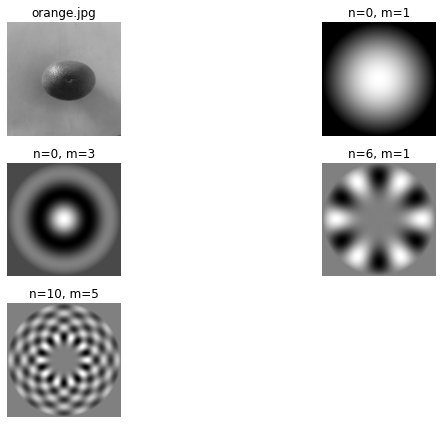

In [16]:
# Bessel images
combinations = [(0, 1), (0, 3), (6, 1), (10, 5)]
titles = [f"n={n}, m={m}" for n, m in combinations]
bessel_images = [generate_polar_image(n, m) for n, m in combinations]

# orange image
orange = cv2.imread('../my_data/orange.jpg', cv2.IMREAD_GRAYSCALE)
orange = cv2.resize(orange, (256, 256))  # Resize to match

all_images = [orange] + bessel_images
all_titles = ["orange.jpg"] + titles

# plot func
def plot_images(images, titles=None, cols=2, figsize=(10, 6)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show all 5 images
plot_images(all_images, all_titles)

### 🧹 Task 2.c: Low-Pass Filtering in the Frequency Domain

#### 🧠 What is a Low-Pass Filter?

A **low-pass filter** lets **low-frequency components** of an image pass through and blocks the **high-frequency components**. 

- **Low frequencies** in an image correspond to smooth or slowly changing areas (gradients, broad shapes).
- **High frequencies** correspond to rapid changes (edges, fine details, noise).

When we take the **2D Fourier Transform (FFT)** of an image:

- The **center** of the transformed image contains the lowest frequencies.
- Frequencies increase as we move **outwards** from the center in all directions.


#### 🔬 Our Goal

1. **Compute the 2D FFT** of the image and visualize its magnitude spectrum.
2. Apply three different **ideal low-pass filters** to that FFT:
   - **X-axis low-pass filter** (vertical band)
   - **Y-axis low-pass filter** (horizontal band)
   - **Circular (radial) low-pass filter** (circle around the center)
3. **Reconstruct** the filtered images by taking the inverse FFT.
4. **Display** and compare the results.

We'll do this for each of the 6 images. The key concept is how to **define the bounds** of each filter if we only want to keep an $\alpha$-ratio of the frequency content. We will use $\alpha$ as the ratio of pixels we can keep from the whole image |(Fourier transform of the image):


#### 🛠️ Building Each Low-Pass Filter

Let’s assume your image has shape `H x W` (height × width) (in our case the images are 256 x 256 pixels). We want to construct filters that keep a fraction $\alpha$ of the frequencies around the center.

### 1. X-Axis Low-Pass Filter

- **Idea**: Keep only a vertical band of frequencies near the center along the x-axis.
- Let `W` be the width (number of columns).
- We decide on `kx = floor(α * W / 2)` or something similar to define the half-width.
  - This means we keep columns from `(W/2 - kx)` to `(W/2 + kx)`.
  - Everything else (columns further from the center) is set to **0**.

In practice, if we want to be more exact about "α fraction of the total frequency area," you might do:
- Total area = `H * W`.
- So if α = 0.1, we keep 10% of the frequencies. For an **ideal band** in x, we can define the band width so that `(2 * kx + 1) * H ≈ α * (H * W)`.
- Solve for `kx`.

### 2. Y-Axis Low-Pass Filter

- **Idea**: Keep only a horizontal band of frequencies near the center along the y-axis.
- Let `H` be the height (number of rows).
- Define `ky = floor(α * H / 2)` or solve for it similarly.
- Keep rows from `(H/2 - ky)` to `(H/2 + ky)`.
- Set everything else (rows further from the center) to **0**.

### 3. Circular (Radial) Low-Pass Filter

- **Idea**: Keep frequencies within a circle of radius `r_max` around the center `(cx, cy) = (W/2, H/2)`.
- The distance of a point `(i, j)` in the frequency plane from the center is:
  $$
    r(i, j) = \sqrt{(i - cy)^2 + (j - cx)^2}.
  $$
- If we want α fraction of the total **frequency pixels** (area-based), then:
  $$
    \text{Area of circle} = \pi \cdot r_{\text{max}}^2 = \alpha \times (H \times W).
  $$
  Hence:
  $$
    r_{\text{max}} = \sqrt{\frac{\alpha \times (H \times W)}{\pi}}.
  $$
- We set the filter to **1** if `r(i, j) ≤ r_max`, and **0** otherwise.


## 🗺️ Step-by-Step Flow (for Each Image of Your 5 Images)

1. **Load the image**.
2. **Compute 2D FFT**:
   - Use `np.fft.fft2` or similar.
   - Shift the zero-frequency component to the center using `np.fft.fftshift`.
   - **Visualize** the magnitude using something like:
     ```python
     plt.imshow(np.log(1 + np.abs(fft_image)), cmap='gray')
     plt.title("Frequency Magnitude Spectrum")
     plt.show()
     ```
3. **Build your filters**:
   - **X-axis low-pass** (vertical band).
   - **Y-axis low-pass** (horizontal band).
   - **Circular low-pass** (circle around center).
   - **Note!** Here we choose $\alpha = 0.05$
4. **Apply the filters** to the shifted FFT:
   - `filtered_fft = fft_image_shifted * filter_mask`
5. **Inverse FFT**:
   - Shift back if needed using `np.fft.ifftshift`, then do `np.fft.ifft2`.
   - The result is your **filtered image**.
6. **Display**:
   - Original image.
   - Magnitude spectrum (to show them the frequencies).
   - The **three filtered images** (X, Y, Circular). (using inverse Fourier transform)

You can see an illustration for how the filters are supposed to look like here:
![low_pass_filters.png](assets/low_pass_filters.png)

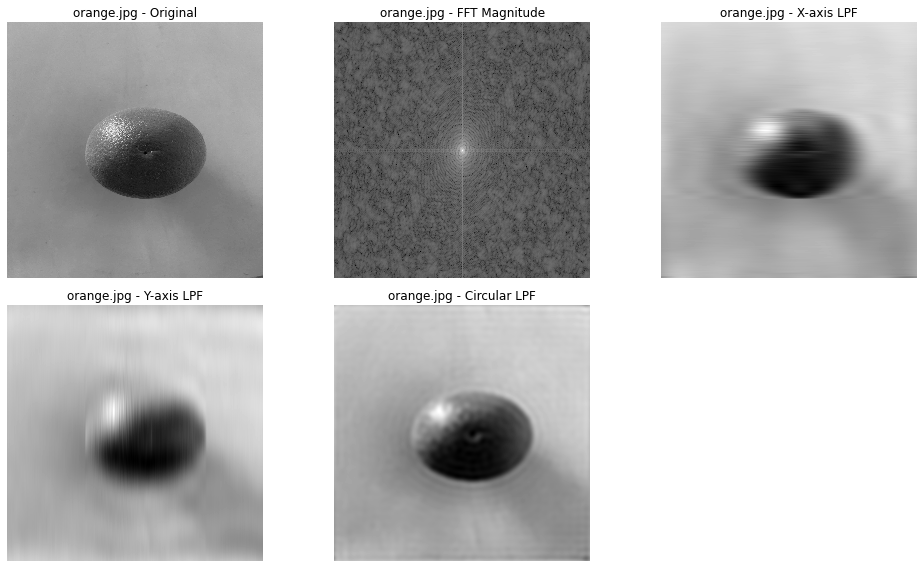

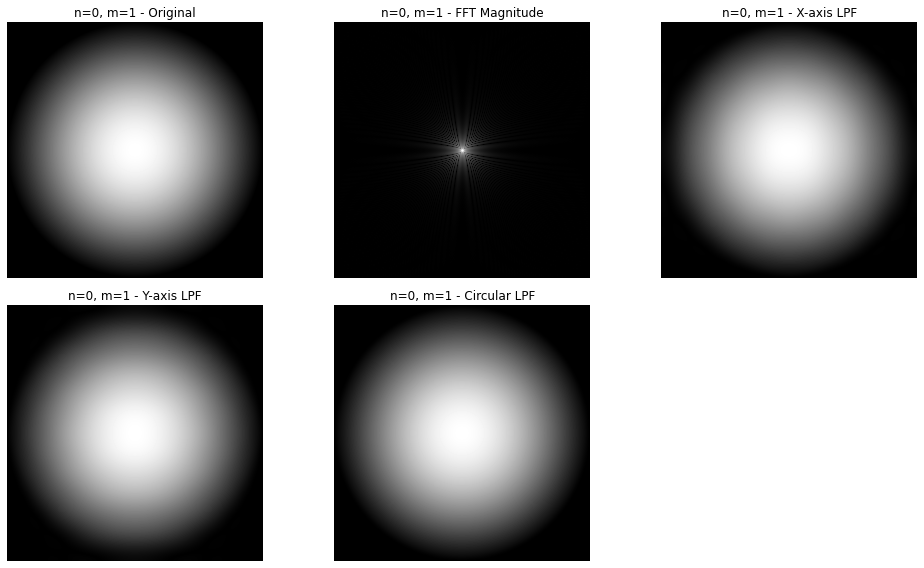

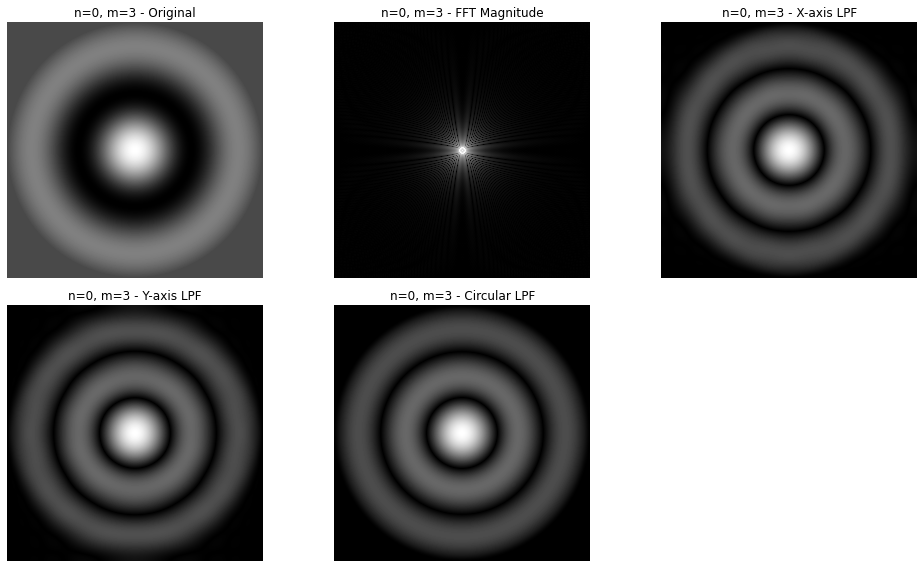

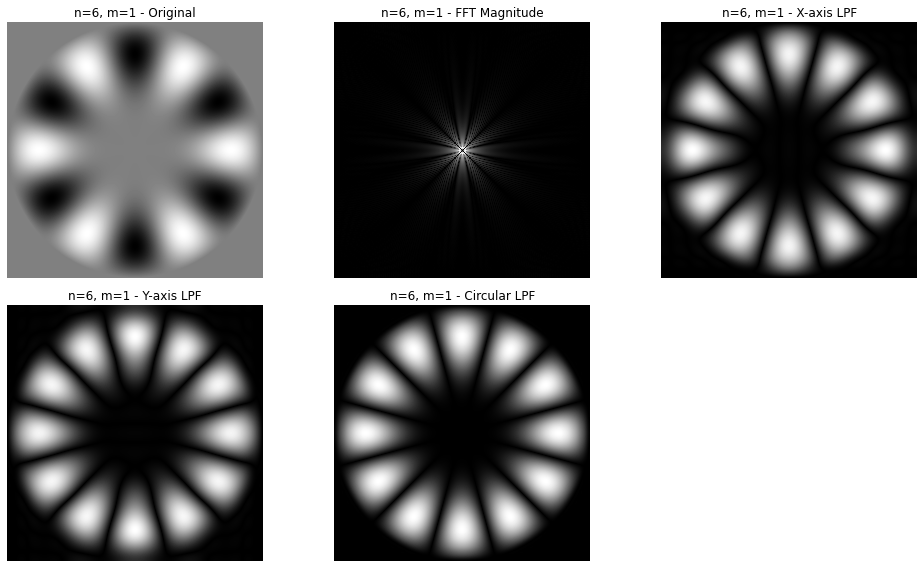

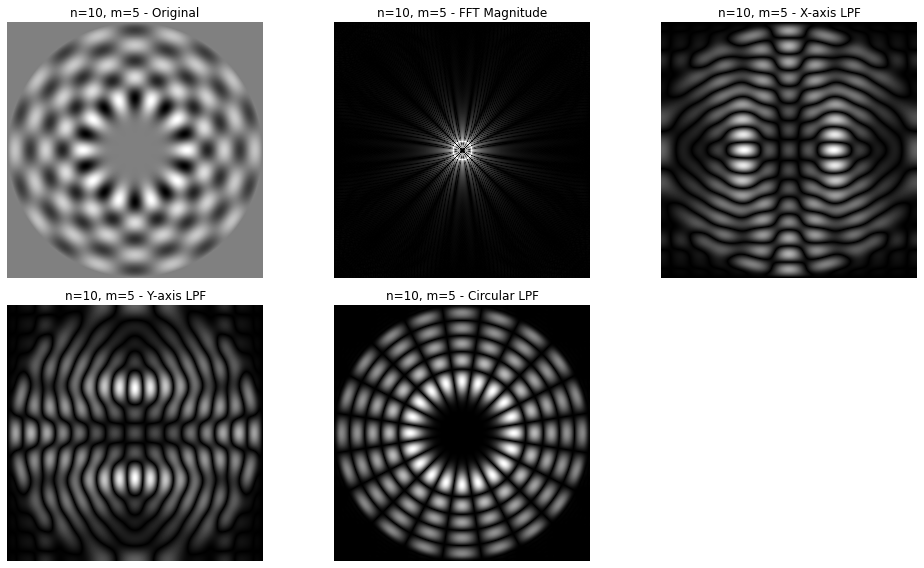

In [17]:

# funcs
def build_filters(H, W, alpha=0.05):
    kx = int((alpha * H * W) / (2 * H))
    ky = int((alpha * H * W) / (2 * W))
    r_max = np.sqrt(alpha * H * W / np.pi)

    Y, X = np.ogrid[:H, :W]
    cx, cy = W // 2, H // 2
    R = np.sqrt((X - cx)**2 + (Y - cy)**2)

    x_filter = np.zeros((H, W)); x_filter[:, cx - kx: cx + kx + 1] = 1
    y_filter = np.zeros((H, W)); y_filter[cy - ky: cy + ky + 1, :] = 1
    circ_filter = (R <= r_max).astype(np.float32)

    return x_filter, y_filter, circ_filter

def apply_filter_and_ifft(img, filt):
    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    filtered = F_shift * filt
    img_back = np.fft.ifft2(np.fft.ifftshift(filtered))
    return np.abs(img_back), np.log(1 + np.abs(F_shift))

def plot_images(images, titles, cols=3, figsize=(14, 8)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# use prev images
alpha = 0.05
H, W = all_images[0].shape
fx, fy, fc = build_filters(H, W, alpha)

# filter and display
for img, title in zip(all_images, all_titles):
    img_fx, mag = apply_filter_and_ifft(img, fx)
    img_fy, _   = apply_filter_and_ifft(img, fy)
    img_fc, _   = apply_filter_and_ifft(img, fc)

    plot_images(
        [img, mag, img_fx, img_fy, img_fc],
        titles=[
            f"{title} - Original",
            f"{title} - FFT Magnitude",
            f"{title} - X-axis LPF",
            f"{title} - Y-axis LPF",
            f"{title} - Circular LPF"
        ]
    )


### 📏 Tsk 2.d MSE Comparison
#### 🧮 MSE Formula

Let:
- `I` be the **original image**,
- `Î` be the **reconstructed (filtered) image**,
- Both images have dimensions `H x W`.

Then the **MSE** is defined as:

$$
\text{MSE} = \frac{1}{H \times W} \sum_{i=0}^{H-1} \sum_{j=0}^{W-1} \left( I(i,j) - \hat{I}(i,j) \right)^2
$$

This is simply the **average squared difference** between corresponding pixel values.

For each pair of (n,m) you chose and the image you chose:
1. Compute the **Mean Squared Error (MSE)** between the original image and each of the three filtered images.
2. Fill the following table:

| Image (n, m) / Yours| MSE (X) | MSE (Y) | MSE (Circular) |
|--------------|---------|---------|----------------|
| (0, 1)       |         |         |                |
| ...          |         |         |                |

3. Comment on:
   - Do X and Y filters have the same MSE when symmetry exists?
   - Does lower MSE always match the best-looking image?


In [18]:
import pandas as pd

mse_data = []


for img, title in zip(all_images, all_titles):
    img_x, _ = apply_filter_and_ifft(img, fx)
    img_y, _ = apply_filter_and_ifft(img, fy)
    img_c, _ = apply_filter_and_ifft(img, fc)

    mse_x = np.mean((img - img_x) ** 2)
    mse_y = np.mean((img - img_y) ** 2)
    mse_c = np.mean((img - img_c) ** 2)

    mse_data.append([title, mse_x, mse_y, mse_c])

mse_df = pd.DataFrame(mse_data, columns=["Image", "MSE (X)", "MSE (Y)", "MSE (Circular)"])
print(mse_df)


        Image    MSE (X)    MSE (Y)  MSE (Circular)
0  orange.jpg  19.923603  30.224299    1.613914e+01
1    n=0, m=1   0.000015   0.000015    2.470178e-07
2    n=0, m=3   0.081933   0.081933    8.197135e-02
3    n=6, m=1   0.040196   0.040125    4.019777e-02
4   n=10, m=5   0.012205   0.012313    1.611116e-02


### 🧠 Task 2.e Open Questions

1. For images with $ n = 0 $ (radial symmetry), which filter performed best? Why?
2. For images with $ n > 0 $, how does increasing $ n $ affect:
   - Symmetry?
   - Visual appearance of filters?
   - MSE of each filter?
3. When does MSE fail to reflect visual distortion?
4. Is circular filtering still optimal when symmetry is broken?
5. Try increasing $ n $ to very high values. What happens to the symmetry? Can you find a threshold where radial filtering is no longer ideal?


## <img src="https://img.icons8.com/external-filled-outline-wichaiwi/64/000000/external-importance-key-performance-indicators-filled-outline-wichaiwi.png" style="height:50px;display:inline"/> Part 3 - The Importance of Phase and Amplitude in Images
---


The 2D-DFT of an image $f[n,m] \in \mathbb{R}^{M\times N}$ is complex: $F[k,l] \in \mathbb{C}^{M\times N}$. Therefore it can be written as:

$F[k,l] = A[k,l]e^{j\phi[k,l]}$

where $A[k,l]=|F[k,l]| \in \mathbb{R}^{M\times N}$ and $\phi[k,l]=\tan^{-1}\frac{Im\{F[k,l]\}}{Re\{F[k,l]\}} \in \mathbb{R}^{M\times N}$ are the 2D-DFT's amplitude and phase, respectively. 

In this question we will understand the importance of these two elements of the transform.

### 3.a - Create the input - a selfie
Load the image `parrot.png`, and convert it to grayscale. In addition, take a Selfie picture (self-portrait) and call it `yours.jpg`. Load the selfie image, resize it to the same size of the parrot image (use `cv2.resize`) and convert it to grayscale. Finally, make sure that both images are in uint8 format. Display the images.

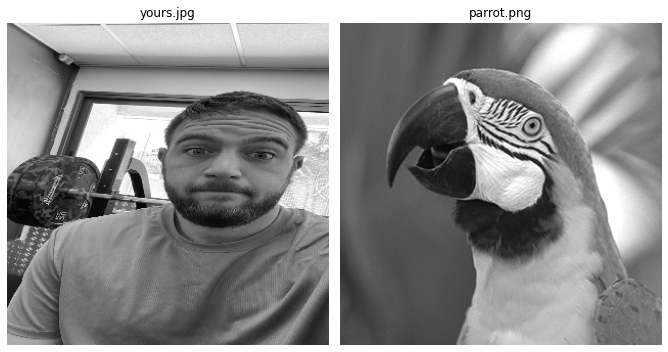

In [19]:
def plot_images(images, titles, cols=3, figsize=(14, 8)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

parrot = cv2.imread('../given_data/parrot.png', cv2.IMREAD_GRAYSCALE)
yours = cv2.imread('../my_data/yours.jpg', cv2.IMREAD_GRAYSCALE)


yours = cv2.resize(yours, (parrot.shape[1], parrot.shape[0]))
# print images
plot_images([yours, parrot], ["yours.jpg", "parrot.png"])

### 3.b - Ampitude and phase of inputs
Calculate the 2D-DFT of both images. Calculate the phase and the amplitude of each image and display the amplitude images you got. Note: use `phase=np.angle(fft_image)` to calculate the phase and `amp=np.abs(fft_image)` to calculate the amplitude).

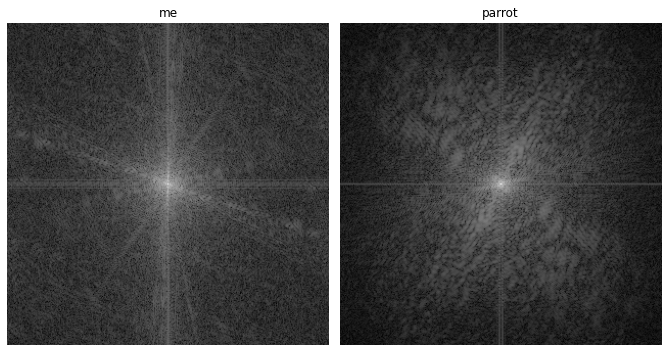

In [20]:

yours_f = yours.astype(np.float32) / 255.0
parrot_f = parrot.astype(np.float32) / 255.0
F_yours = np.fft.fft2(yours_f)
F_parrot = np.fft.fft2(parrot_f)

#amplitude and phase
amp_yours = np.abs(F_yours)
phase_yours = np.angle(F_yours)

amp_parrot = np.abs(F_parrot)
phase_parrot = np.angle(F_parrot)

#added center and log scale to see difference)

plot_images(
    [np.log1p(np.fft.fftshift(amp_yours)), np.log1p(np.fft.fftshift(amp_parrot))],
    ["me", "parrot"]
)

### 3.c - Mixing things up
Create the following two images (in the transform domain):
1.	An image with the amplitude of `yours` and the phase of `parrot`.
2.	An image with the amplitude of `parrot` and the phase of `yours`.

Perform the inverse transform and display the resulting images. Obtain real values by applying `abs()` on the `ifft` result. Which image is more similar to the `yours` image?


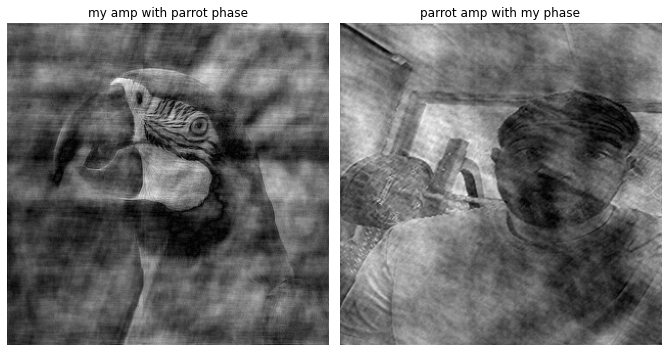

In [21]:
#my amp and parrot pahse
F_mix1 = amp_yours * np.exp(1j * phase_parrot)
img_mix1 = np.fft.ifft2(F_mix1)
img_mix1 = np.abs(img_mix1)

#parrot amp and my pahse
F_mix2 = amp_parrot * np.exp(1j * phase_yours)
img_mix2 = np.fft.ifft2(F_mix2)
img_mix2 = np.abs(img_mix2)


plot_images(
    [img_mix1, img_mix2],
    ["my amp with parrot phase", "parrot amp with my phase"]
)

### 3.d - Let's be random
Create the following two images (in the transform domain):
1.	An image with a random amplitude (consider the range of values you randomly draw - use uniform distribution) and the phase of `yours`.
2.	An image with the amplitude of `yours` and a random phase (again, consider the range of values and use uniform distribution).

Perform the inverse transform and display the resulting images. Obtain real values by applying `abs()` on the `ifft` result. Explain the differences between the images in this section and the previous one. What can we learn from each of the images?


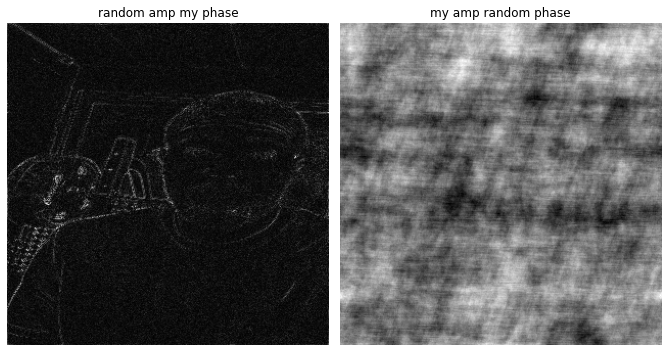

In [22]:
H, W = yours.shape
random_amp = np.random.uniform(low=0.0, high=np.max(amp_yours), size=(H, W))
random_phase = np.random.uniform(low=-np.pi, high=np.pi, size=(H, W))

# rand amp my phase
F_rand_amp = random_amp * np.exp(1j * phase_yours)
img_rand_amp = np.abs(np.fft.ifft2(F_rand_amp))

# my amp rand phase
F_rand_phase = amp_yours * np.exp(1j * random_phase)
img_rand_phase = np.abs(np.fft.ifft2(F_rand_phase))


plot_images(
    [img_rand_amp, img_rand_phase],
    ["random amp my phase", "my amp random phase"]
)

### 3.e - Conclude
Based on the results of the previous sections, which one is more important in the information of the image: the phase or the amplitude?

**Note:** For those interested, the course Moodle website includes an article on amplitude and phase in Fourier transform.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com